In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
file_path = "/Users/mayarios/Desktop/Spring 25"

csv_files = [f for f in os.listdir(file_path) if f.endswith(".csv")]

full_dataframe = pd.concat(
    [pd.read_csv(os.path.join(file_path, f), low_memory=False) for f in csv_files],
    ignore_index=True
)

full_dataframe.to_csv(os.path.join(file_path, "combined_class_data.csv"), index=False)
print(full_dataframe.head())


       yr service     inci_id                 calltime case_id callsource  \
0  2018.0    LAW   18000001.0  2018-01-01 00:01:07.000     NaN       W911   
1  2018.0    LAW   18000002.0  2018-01-01 00:01:16.000     NaN       E911   
2  2018.0    LAW   18000004.0  2018-01-01 00:02:24.000     NaN      PHONE   
3  2018.0    LAW   18000005.0  2018-01-01 00:03:04.000     NaN       E911   
4  2018.0    LAW   18000016.0  2018-01-01 00:07:28.000     NaN       W911   

              nature closecode                closed_as  secs_to_disp  ...  \
0        SHOTS FIRED      QOA          QUIET ON ARRIVAL        1459.0  ...   
1  ILLEGAL FIREWORKS      DDIS  DISREGARDED BY DISPATCH           NaN  ...   
2  ILLEGAL FIREWORKS      DDIS  DISREGARDED BY DISPATCH           NaN  ...   
3  ILLEGAL FIREWORKS      DDIS  DISREGARDED BY DISPATCH           NaN  ...   
4  ILLEGAL FIREWORKS      DDIS  DISREGARDED BY DISPATCH           NaN  ...   

   Call_Source  Call_Priority  InitialIncidentTypeDescription  IsPri

In [17]:
full_dataframe.head()

,yr,service,inci_id,calltime,case_id,callsource,nature,closecode,closed_as,secs_to_disp,...,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,2018.0,LAW,18000001.0,2018-01-01 00:01:07.000,NaN,W911,SHOTS FIRED,QOA,QUIET ON ARRIVAL,1459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,LAW,18000002.0,2018-01-01 00:01:16.000,NaN,E911,ILLEGAL FIREWORKS,DDIS,DISREGARDED BY DISPATCH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,LAW,18000004.0,2018-01-01 00:02:24.000,NaN,PHONE,ILLEGAL FIREWORKS,DDIS,DISREGARDED BY DISPATCH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,LAW,18000005.0,2018-01-01 00:03:04.000,NaN,E911,ILLEGAL FIREWORKS,DDIS,DISREGARDED BY DISPATCH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,LAW,18000016.0,2018-01-01 00:07:28.000,NaN,W911,ILLEGAL FIREWORKS,DDIS,DISREGARDED BY DISPATCH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Remove duplicate rows
full_dataframe = full_dataframe.drop_duplicates()
print(full_dataframe.tail())


              yr service     inci_id                 calltime    case_id  \
10133048  2016.0    LAW   16317999.0  2016-12-31 23:47:13.000  1700002.0   
10133049  2016.0    LAW   16318002.0  2016-12-31 23:51:56.000        NaN   
10133050  2016.0    LAW   16318004.0  2016-12-31 23:55:57.000        NaN   
10133051  2016.0    LAW   16318007.0  2016-12-31 23:59:27.000        NaN   
10133052  2016.0    LAW   16318008.0  2016-12-31 23:59:44.000        NaN   

         callsource                 nature closecode           closed_as  \
10133048       SELF           TRAFFIC STOP      REPT        REPORT TAKEN   
10133049      PHONE       BEAT INFORMATION      UTD   UNABLE TO DISPATCH   
10133050      PHONE  ASSIST PUBLIC- POLICE      ASST            ASSISTED   
10133051      PHONE              TRANSPORT      ASST            ASSISTED   
10133052      PHONE            SHOTS FIRED      PCHK        PATROL CHECK   

          secs_to_disp  ...  Call_Source  Call_Priority  \
10133048           0.0  ...

In [19]:
print(sorted(full_dataframe["nature"].dropna().unique()))




['ABANDONED ANIMAL', 'ABANDONED BIKE', 'ABANDONED PROPERTY', 'ABANDONED VEHICLE', 'ACCIDENT AIRCRAFT INJURY', 'ACCIDENT ATV INJURY', 'ACCIDENT BIKE', 'ACCIDENT INDUSTRIAL', 'ACCIDENT TRAIN INJURY', 'ACCIDENT VEHICLE BIKE', 'ALARM', 'ALARM BC ACTIVATION', 'ALARM DURESS', 'ALARM HOLD UP', 'ALARM PANIC', 'ALARM SILENT', 'ALARM VARDA', 'ANIMAL ABUSE', 'ANIMAL AT LARGE', 'ANIMAL ATTACK/BITE', 'ANIMAL BITE', 'ANIMAL COMPLAINT', 'ANIMAL CRUELTY', 'ARMED DISPUTE', 'ARMED ROBBERY', 'ARMED SUBJECT', 'ARREST', 'ARSON', 'ASSAULT', 'ASSAULT APA', 'ASSAULT PUBLIC SAFETY OFFICER', 'ASSAULT WITH INJURY', 'ASSIST FD, CAHOOTS', 'ASSIST FIRE DEPARTMENT', 'ASSIST MOTORIST', 'ASSIST OREGON STATE POLICE', 'ASSIST OUTSIDE AGENCY', 'ASSIST PD, CAHOOTS', 'ASSIST POLICE', 'ASSIST PUBLIC WORKS', 'ASSIST PUBLIC- POLICE', 'ASSIST SHERIFFS OFFICE', 'ATTEMPT TO LOCATE', 'ATTEMPT TO LOCATE CANCEL', 'ATTEMPT TO LOCATE DRUNK DRIVER', 'AUDIBLE ALARM', 'AWARE ALARM', 'BAR CHECK', 'BEAT INFORMATION', 'BIKE SKATEBOARD COMP

In [20]:
cahoots_only = full_dataframe[full_dataframe["nature"].str.contains("CAHOOTS", na=False)]
print(cahoots_only["nature"].unique())
print(cahoots_only.head())


['PUBLIC ASSIST, CAHOOTS' 'INTOXICATED SUBJECT, CAHOOTS'
 'TRAFFIC HAZARD, CAHOOTS' 'DISORDERLY SUBJECT, CAHOOTS'
 'INFO / ATL, CAHOOTS' 'CHECK WELFARE, CAHOOTS'
 'SUICIDAL SUBJECT, CAHOOTS' 'ASSIST FD, CAHOOTS' 'ASSIST PD, CAHOOTS'
 'TRANSPORT, CAHOOTS' 'DISORIENTED SUBJECT, CAHOOTS'
 'FOUND SYRINGE, CAHOOTS']
             yr service     inci_id                 calltime case_id  \
1176011  2024.0    OTHR  24000016.0  2024-01-01 00:08:16.000     NaN   
1176014  2024.0    OTHR  24000022.0  2024-01-01 00:11:06.000     NaN   
1176017  2024.0    OTHR  24000027.0  2024-01-01 00:14:40.000     NaN   
1176025  2024.0    OTHR  24000047.0  2024-01-01 00:27:33.000     NaN   
1176049  2024.0    OTHR  24000113.0  2024-01-01 01:35:12.000     NaN   

        callsource                        nature closecode         closed_as  \
1176011      PHONE        PUBLIC ASSIST, CAHOOTS      TRAN    TRANSPORT MADE   
1176014      PHONE  INTOXICATED SUBJECT, CAHOOTS      UTL   UNABLE TO LOCATE   
1176017       

In [28]:
cahoots_natures = cahoots_only["nature"].unique()
base_natures = [nature.split(", CAHOOTS")[0].strip() for nature in cahoots_natures]
shared_natures = [nature for nature in base_natures 
                 if nature in full_dataframe["nature"].values]

print("Nature types that appear in both CAHOOTS and non-CAHOOTS forms:")
print(shared_natures)

comparison_data = []
for nature in shared_natures:
    cahoots_count = full_dataframe[full_dataframe["nature"] == f"{nature}, CAHOOTS"]["nature"].count()
    non_cahoots_count = full_dataframe[full_dataframe["nature"] == nature]["nature"].count()
    comparison_data.append({
        "Nature": nature,
        "CAHOOTS Cases": cahoots_count,
        "Non-CAHOOTS Cases": non_cahoots_count,
        "Total Cases": cahoots_count + non_cahoots_count,
        "% CAHOOTS": f"{100*cahoots_count/(cahoots_count + non_cahoots_count):.1f}%"
    })

comparison_df = pd.DataFrame(comparison_data).sort_values("Total Cases", ascending=False)
print("\nComparison of CAHOOTS vs non-CAHOOTS cases:")
print(comparison_df)

Nature types that appear in both CAHOOTS and non-CAHOOTS forms:
['INTOXICATED SUBJECT', 'TRAFFIC HAZARD', 'DISORDERLY SUBJECT', 'CHECK WELFARE', 'SUICIDAL SUBJECT', 'TRANSPORT', 'DISORIENTED SUBJECT', 'FOUND SYRINGE']

Comparison of CAHOOTS vs non-CAHOOTS cases:
                Nature  CAHOOTS Cases  Non-CAHOOTS Cases  Total Cases  \
3        CHECK WELFARE          16569             110742       127311   
2   DISORDERLY SUBJECT           1235              60669        61904   
5            TRANSPORT           4941              46324        51265   
1       TRAFFIC HAZARD           1094              33998        35092   
4     SUICIDAL SUBJECT           4474              25936        30410   
0  INTOXICATED SUBJECT            686               7903         8589   
7        FOUND SYRINGE            484               4526         5010   
6  DISORIENTED SUBJECT            598               2227         2825   

  % CAHOOTS  
3     13.0%  
2      2.0%  
5      9.6%  
1      3.1%  
4     14.

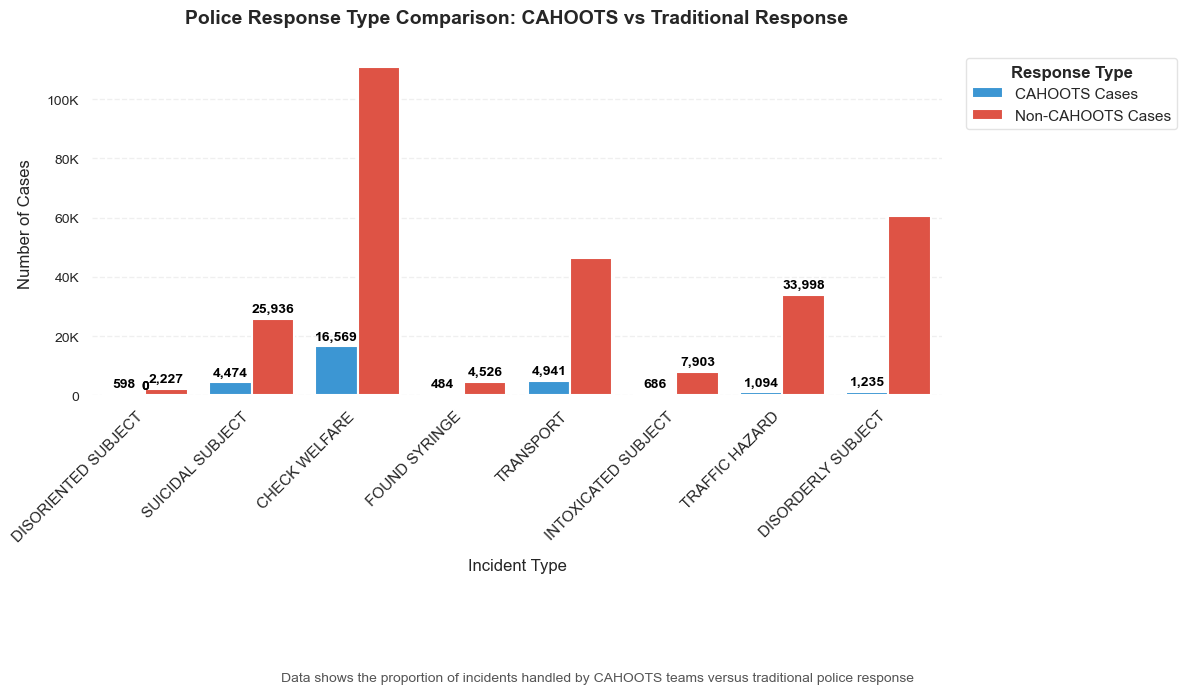

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'axes.edgecolor': '0.4'})
plt.rcParams['font.family'] = 'Arial'

# Prepare data - take top 10 and sort by CAHOOTS percentage
top_10 = comparison_df.sort_values('Pct_CAHOOTS', ascending=False).copy()  # Already has 8 rows
melted_df = top_10.melt(
    id_vars=["Nature"], 
    value_vars=["CAHOOTS Cases", "Non-CAHOOTS Cases"],
    var_name="Response Type", 
    value_name="Case Count"
)

# Create figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Nature",
    y="Case Count",
    hue="Response Type",
    data=melted_df,
    palette={"CAHOOTS Cases": "#3498db", "Non-CAHOOTS Cases": "#e74c3c"},
    saturation=0.9,
    edgecolor="white",
    linewidth=1.5
)

# Custom formatting
def thousands(x, pos):
    return f'{int(x/1000)}K' if x >= 1000 else int(x)
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

# Add value labels with contrast
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height()):,}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center',
        xytext=(0, 7),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold',
        color='white' if p.get_height() > max(top_10['Total Cases'])*0.3 else 'black'
    )


# Styling
plt.title("Police Response Type Comparison: CAHOOTS vs Traditional Response", 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Incident Type", labelpad=10, fontsize=12)
plt.ylabel("Number of Cases", labelpad=10, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)

# Custom legend
legend = plt.legend(title="Response Type", frameon=True, 
                   bbox_to_anchor=(1.02, 1), loc='upper left')
legend.get_frame().set_edgecolor('#dddddd')
legend.get_title().set_fontweight('bold')

# Add caption
plt.figtext(0.5, -0.15, 
           "Data shows the proportion of incidents handled by CAHOOTS teams versus traditional police response",
           ha="center", fontsize=10, color='#555555')

# Adjust layout
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.grid(axis='y', alpha=0.3)

# Save as high-res PNG
plt.savefig('cahoots_comparison_visualization.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white',
            transparent=False)

plt.show()